Confusion Matrix:
 [[ 36 176]
 [339  18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.17      0.12       212
           1       0.09      0.05      0.07       357

    accuracy                           0.09       569
   macro avg       0.09      0.11      0.09       569
weighted avg       0.09      0.09      0.09       569



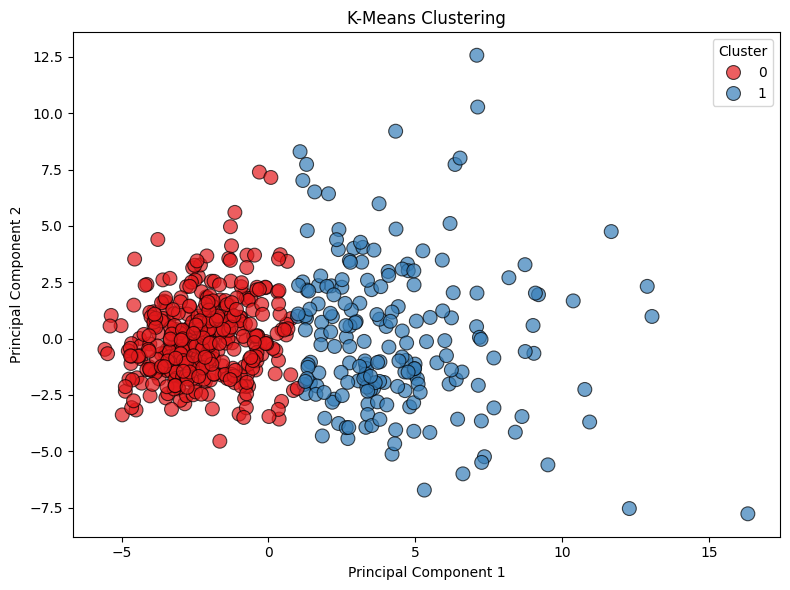

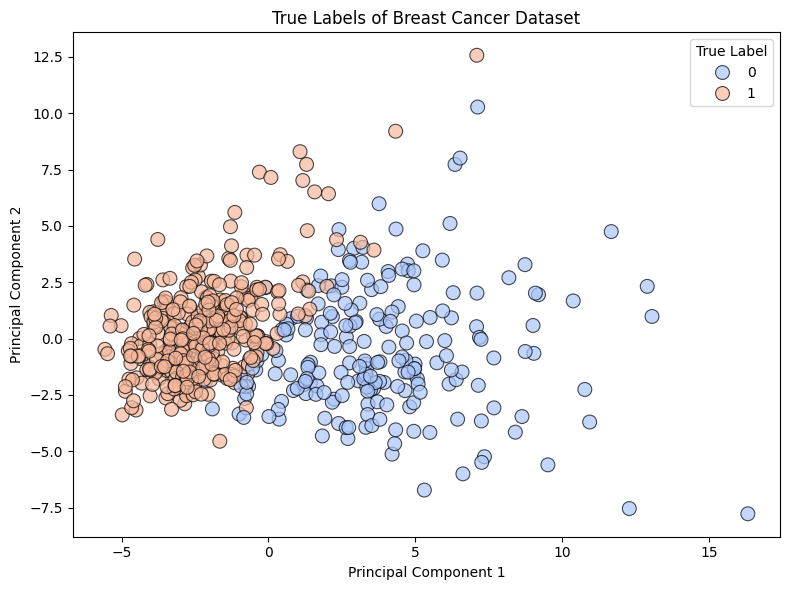

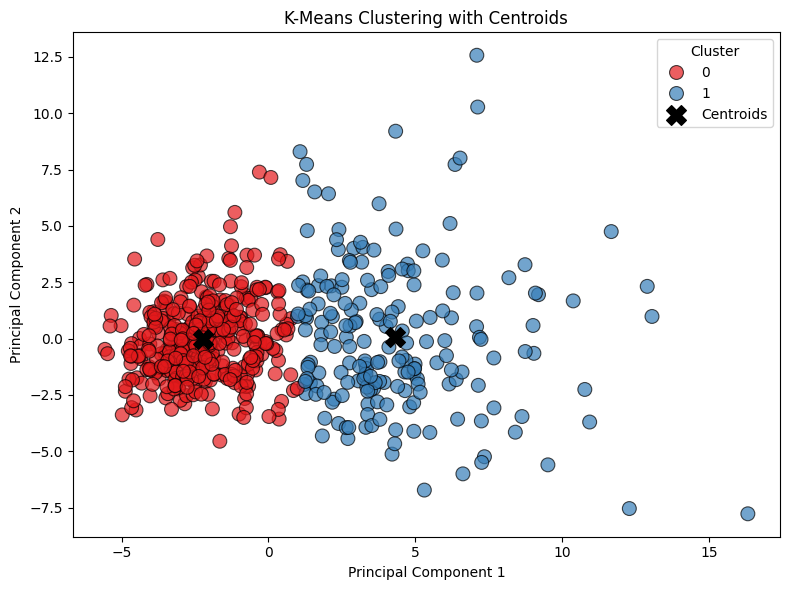

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

# Load and preprocess data
X, y = load_breast_cancer(return_X_y=True)
X_scaled = StandardScaler().fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y, y_kmeans))
print("\nClassification Report:\n", classification_report(y, y_kmeans))

# PCA for visualization
X_pca = PCA(n_components=2).fit_transform(X_scaled)
centers_pca = PCA(n_components=2).fit(X_scaled).transform(kmeans.cluster_centers_)

# Create dataframe
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = y_kmeans
df['True Label'] = y

# Plot settings
def plot_clusters(hue, title, palette, add_centroids=False):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='PC1', y='PC2', hue=hue,
                    palette=palette, s=100, edgecolor='black', alpha=0.7)
    if add_centroids:
        plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
                    s=200, c='black', marker='X', label='Centroids')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title=hue)
    plt.tight_layout()
    plt.show()

# Visualizations
plot_clusters('Cluster', 'K-Means Clustering', 'Set1')
plot_clusters('True Label', 'True Labels of Breast Cancer Dataset', 'coolwarm')
plot_clusters('Cluster', 'K-Means Clustering with Centroids', 'Set1', add_centroids=True)

Confusion Matrix:
[[175  37]
 [ 13 344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.92      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



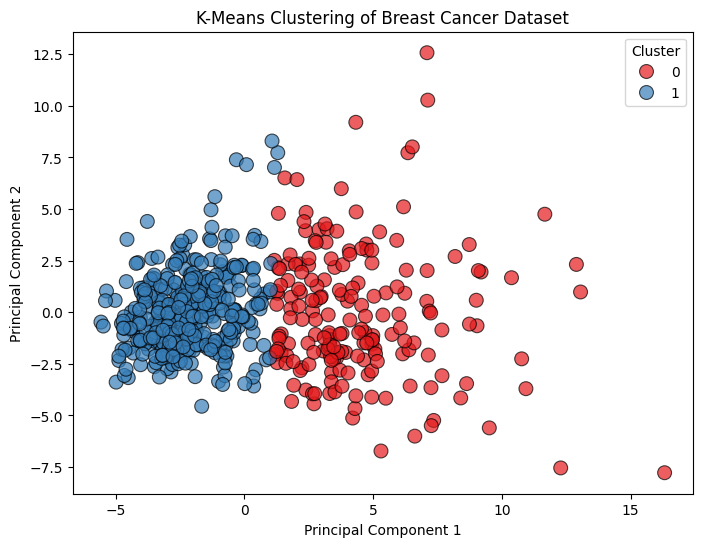

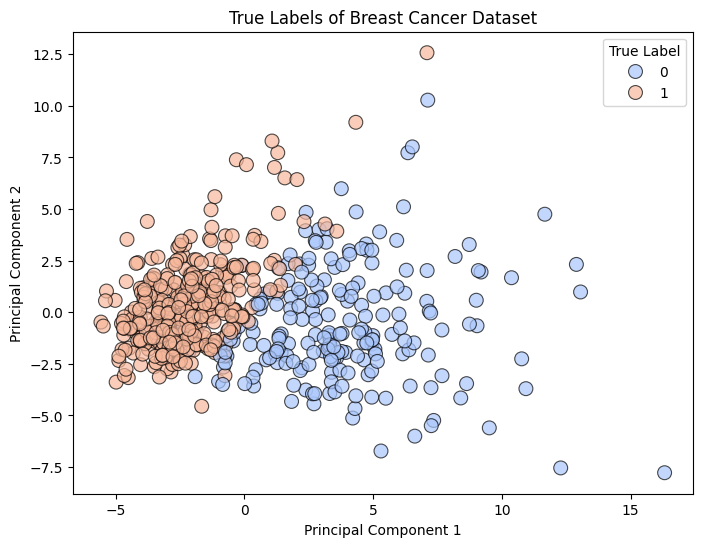

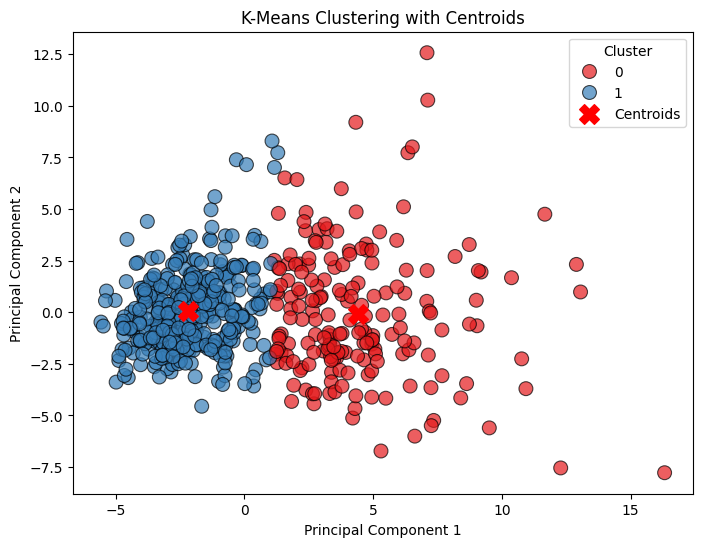

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y, y_kmeans))

print("\nClassification Report:")
print(classification_report(y, y_kmeans))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = y_kmeans
df['True Label'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x='PC1', y='PC2', hue='Cluster',
    palette='Set1', s=100, edgecolor='black', alpha=0.7
)
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x='PC1', y='PC2', hue='True Label',
    palette='coolwarm', s=100, edgecolor='black', alpha=0.7
)
plt.title('True Labels of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="True Label")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x='PC1', y='PC2', hue='Cluster',
    palette='Set1', s=100, edgecolor='black', alpha=0.7
)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()
